## VQE

### 1 - Circuitos Parametrizados

In [1]:
# A. Imports
from qiskit import QuantumCircuit, Aer
from qiskit.circuit import Parameter, ParameterVector
import numpy as np

In [ ]:
# B. Criando Circuitos: Parameter

qc_single = QuantumCircuit(1,1)

theta = Parameter('θ')

qc_single.ry(theta, 0)
qc_single.measure([0],[0])
qc_single.draw('mpl')

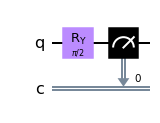

In [ ]:
# C. Avaliando Circuitos: Parameter
v_single = np.pi/2
qc = qc_single.bind_parameters({theta:v_single})
qc.draw('mpl')

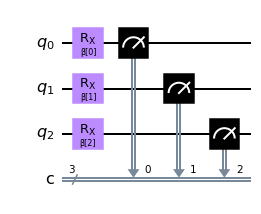

In [ ]:
# D. Criando Circuitos: ParameterVector
n = 3

qc_multiple = QuantumCircuit(n,n)

beta = ParameterVector('β', n)

qc_multiple = QuantumCircuit(n,n)

for x in range(n):
    qc_multiple.rx(beta[x], x)

qc_multiple.measure(range(n),range(n))
qc_multiple.draw('mpl')

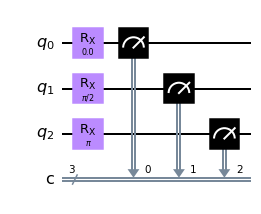

In [ ]:
# E. Avaliando Circuitos: ParameterVector
v_multiple = np.linspace(0, np.pi, n)
bind_qc_multiple = qc_multiple.bind_parameters({beta: v_multiple})

bind_qc_multiple.draw('mpl')

### 2 - VQE

In [ ]:
from qiskit.opflow import StateFn
from qiskit.opflow import I, X, Y, Z
import matplotlib.pyplot as plt

#### 2.1 - Observável Z

In [ ]:
#-- Circuito

angle = 0
qc = QuantumCircuit(1)

qc.rx(angle, 0)

#-- Valor Esperado
observable = Z 
state = StateFn(qc)
expectation_value = (~state @ observable @ state).eval()

#-- Plots
print('Valor Esperado:', expectation_value.real, '\n')
print('Circuito:')
display(qc.draw('mpl'))

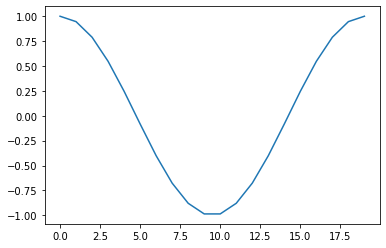

In [8]:
a = Parameter('⍺')
qc_p = QuantumCircuit(1)
qc_p.rx(a,0)

values = np.linspace(0, 2*np.pi, 20)
E = []
for x in values:
    bind_qc_p = qc_p.bind_parameters({a: x})
    state = StateFn(bind_qc_p)
    expectation_value = (~state @ observable @ state).eval()
    E.append(expectation_value.real)

plt.plot(E)  
plt.show()

#### 2.2 - Observável ZZ

Valor Esperado: 0.9900332889206209 

Circuito:


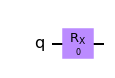

In [9]:
#-- Circuito

angle = 0.1
qc_zz = QuantumCircuit(2)

qc_zz.rx(angle, 0)
qc_zz.rx(angle, 1)

#-- Valor Esperado
observable_zz = Z^Z 
state = StateFn(qc_zz)
expectation_value = (~state @ observable_zz @ state).eval()

#-- Plots
print('Valor Esperado:', expectation_value.real, '\n')
print('Circuito:')
display(qc.draw('mpl'))

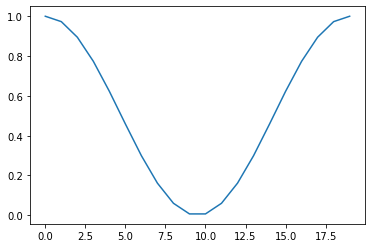

In [10]:
a = Parameter('⍺')
b = Parameter('β')
qc_zz_p = QuantumCircuit(2)
qc_zz_p.rx(a,0)
qc_zz_p.rx(b,1)

values = np.linspace(0, np.pi, 20)
E = []
for x in values:
    bind_qc_zz_p = qc_zz_p.bind_parameters({a: x, b:x})
    state = StateFn(bind_qc_zz_p)
    expectation_value = (~state @ observable_zz @ state).eval()
    E.append(expectation_value.real)

plt.plot(E)  
plt.show()

#### 2.3 - Otimização

In [11]:
def quantum_circuit(params):
    qc = QuantumCircuit(1)
    qc.u3(params[0], params[1], params[2], 0)
    return qc

In [12]:
def objective_function(params):
    qc = quantum_circuit(params)
    state = StateFn(qc)
    return (~state @ O @ state).eval()

In [14]:
O = Z + 2*I - Y
objective_function([0.1,0.1,0])

(2.9850374541986464+0j)

In [ ]:
from qiskit.algorithms.optimizers import COBYLA


optimizer = COBYLA(maxiter=500, tol=0.0001)
params = np.random.rand(3)
ret = optimizer.optimize(num_vars=3, objective_function=objective_function, initial_point=params)

In [16]:
objective_function(ret[0]).real

0.585786438627613